In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

realtor-data.csv (900k+ entries)
- status (Housing status - a. ready for sale or b. ready to build)
- bed (# of beds)
- bath (# of bathrooms)
- acre_lot (Property / Land size in acres)
- city (city name)
- state (state name)
- zip_code (postal code of the area)
- house_size (house area/size/living space in square feet)
- prev_sold_date (Previously sold date)
- price (Housing price, it is either the current listing price or recently sold price if the house is sold recently)

In [2]:
df = pd.read_csv("realtor-data.csv")

In [3]:
df

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0
...,...,...,...,...,...,...,...,...,...,...
904961,for_sale,2.0,2.0,NaN,New York City,New York,10463.0,NaN,2021-08-13,359000.0
904962,for_sale,2.0,2.0,NaN,Bronx,New York,10463.0,1200.0,NaN,299000.0
904963,for_sale,NaN,1.0,NaN,Bronx,New York,10463.0,NaN,NaN,120000.0
904964,for_sale,3.0,2.0,NaN,Bronx,New York,10463.0,NaN,NaN,449000.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904966 entries, 0 to 904965
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   status          904966 non-null  object 
 1   bed             775126 non-null  float64
 2   bath            791082 non-null  float64
 3   acre_lot        638324 non-null  float64
 4   city            904894 non-null  object 
 5   state           904966 non-null  object 
 6   zip_code        904762 non-null  float64
 7   house_size      612080 non-null  float64
 8   prev_sold_date  445865 non-null  object 
 9   price           904895 non-null  float64
dtypes: float64(6), object(4)
memory usage: 69.0+ MB


In [5]:
df.isna().sum().sort_values(ascending=False)

prev_sold_date    459101
house_size        292886
acre_lot          266642
bed               129840
bath              113884
zip_code             204
city                  72
price                 71
status                 0
state                  0
dtype: int64

In [6]:
((df.isna().sum() / len(df)) * 100).sort_values(ascending=False)

prev_sold_date    50.731298
house_size        32.364310
acre_lot          29.464311
bed               14.347500
bath              12.584340
zip_code           0.022542
city               0.007956
price              0.007846
status             0.000000
state              0.000000
dtype: float64

## Data processing

Removing columns city, zip_code and prev_sold_date, because they will be not use

In [7]:
df = df.drop(["city","zip_code","prev_sold_date"], axis=1)

Removing NaN values from column price

In [8]:
df = df.drop(df[df['price'].isnull()].index)

Delete rows with 2 or more NaN values

In [9]:
df = df[~(df.isna().sum(axis=1) >= 2)]

In [10]:
((df.isna().sum() / len(df)) * 100).sort_values(ascending=False)

acre_lot      24.884798
house_size    15.764261
bed            0.576647
bath           0.408540
status         0.000000
state          0.000000
price          0.000000
dtype: float64

Dropping NaN values from columns bed and bath

In [11]:
df = df.drop(df[df['bed'].isnull()].index, axis=0)
df = df.drop(df[df['bath'].isnull()].index, axis=0)

In [12]:
df["status"].value_counts() 

for_sale    700912
Name: status, dtype: int64

All data is ready for_sale so we can drop this column

In [13]:
df = df.drop("status", axis=1)

In [14]:
df["state"].value_counts() 

New Jersey        190286
Massachusetts     148307
New York          132133
Connecticut        78229
New Hampshire      32171
Rhode Island       28194
Vermont            28121
Maine              24555
Puerto Rico        21241
Pennsylvania       14950
Delaware            1929
Virgin Islands       742
Georgia               48
Wyoming                3
West Virginia          3
Name: state, dtype: int64

Removing states which have less then 50 rows

In [15]:
df = df.drop(df[df["state"].map(df["state"].value_counts()) < 50]["state"].index)

In [16]:
df["state"].unique()

array(['Puerto Rico', 'Virgin Islands', 'Massachusetts', 'Connecticut',
       'New Jersey', 'New York', 'New Hampshire', 'Vermont',
       'Rhode Island', 'Maine', 'Pennsylvania', 'Delaware'], dtype=object)

Fit and transform the "state" column to obtain numeric labels

In [17]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['state_numeric'] = label_encoder.fit_transform(df['state'])
df = df.drop("state", axis=1)
df

,bed,bath,acre_lot,house_size,price,state_numeric
0,3.0,2.0,0.12,920.0,105000.0,8
1,4.0,2.0,0.08,1527.0,80000.0,8
2,2.0,1.0,0.15,748.0,67000.0,8
3,4.0,2.0,0.10,1800.0,145000.0,8
4,6.0,2.0,0.05,NaN,65000.0,8
...,...,...,...,...,...,...
904958,1.0,1.0,NaN,700.0,245000.0,6
904959,1.0,1.0,NaN,720.0,265000.0,6
904960,2.0,2.0,NaN,1200.0,399000.0,6
904962,2.0,2.0,NaN,1200.0,299000.0,6


In [18]:
numeric_to_state = {label: state for label, state in enumerate(label_encoder.classes_)}
# Print the mapping
print(numeric_to_state)

{0: 'Connecticut', 1: 'Delaware', 2: 'Maine', 3: 'Massachusetts', 4: 'New Hampshire', 5: 'New Jersey', 6: 'New York', 7: 'Pennsylvania', 8: 'Puerto Rico', 9: 'Rhode Island', 10: 'Vermont', 11: 'Virgin Islands'}


In [19]:
df.describe()

,bed,bath,acre_lot,house_size,price,state_numeric
count,700858.000000,700858.000000,524750.000000,5.892650e+05,7.008580e+05,700858.000000
mean,3.442098,2.570972,11.046648,2.133932e+03,9.413861e+05,4.546667
std,2.070326,1.965174,728.778851,2.952598e+03,2.661683e+06,2.463358
min,1.000000,1.000000,0.000000,1.000000e+02,1.000000e+00,0.000000
25%,2.000000,2.000000,0.100000,1.148000e+03,3.000000e+05,3.000000
50%,3.000000,2.000000,0.230000,1.655000e+03,4.999990e+05,5.000000
75%,4.000000,3.000000,0.690000,2.489000e+03,8.750000e+05,6.000000
max,99.000000,198.000000,100000.000000,1.450112e+06,8.750000e+08,11.000000


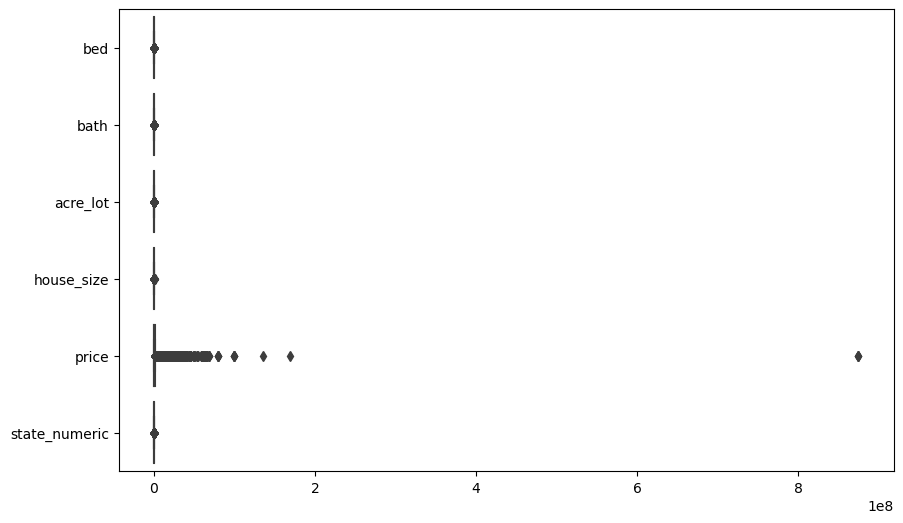

In [20]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, orient="h");

#### Removing points to far from iqr

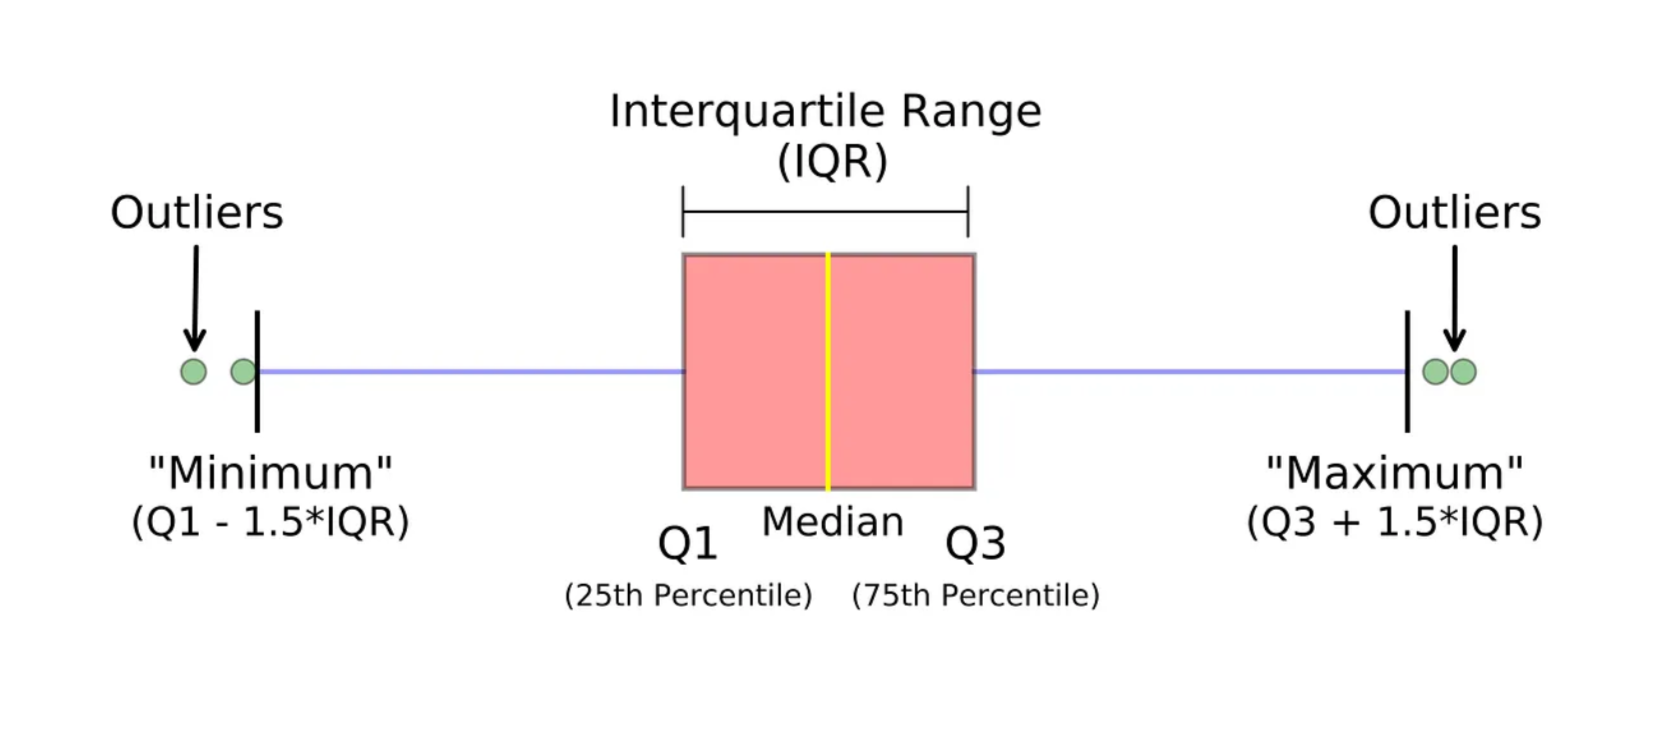
https://medium.com/@agarwal.vishal819/outlier-detection-with-boxplots-1b6757fafa21

From price

In [21]:
q95, q25 = np.percentile(df["price"], [95, 25])
iqrMax = q95  + q25
iqrMax

3195000.0

Checking how many data is over q95

In [22]:
len(df[df["price"]>3150000.0]) / len(df["price"].index) * 100

4.359941671494083

Drop rows in price column over 3150000

In [23]:
df = df.drop(df[df["price"]>3150000.0].index)

<AxesSubplot:xlabel='price'>

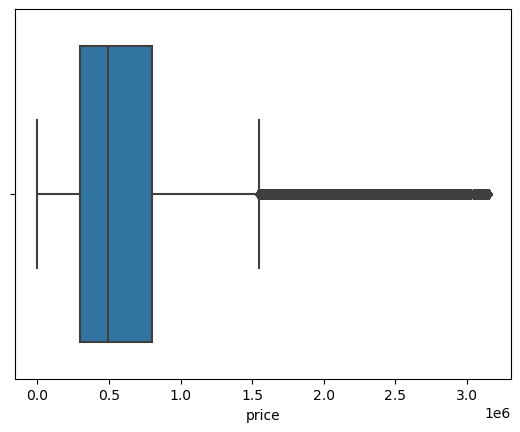

In [24]:
sns.boxplot(data=df, x="price")

<AxesSubplot:xlabel='acre_lot'>

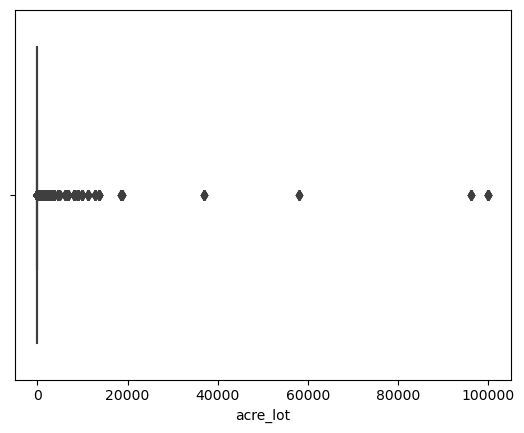

In [25]:
sns.boxplot(data=df, x="acre_lot")

#### Model wont be able to detect acre_lot over 200

In [26]:
len(df[df["acre_lot"] > 200]) / len(df["acre_lot"].index) * 100

0.10114858846995603

In [27]:
df = df.drop(df[df["acre_lot"] > 200].index, axis=0)

<AxesSubplot:xlabel='acre_lot'>

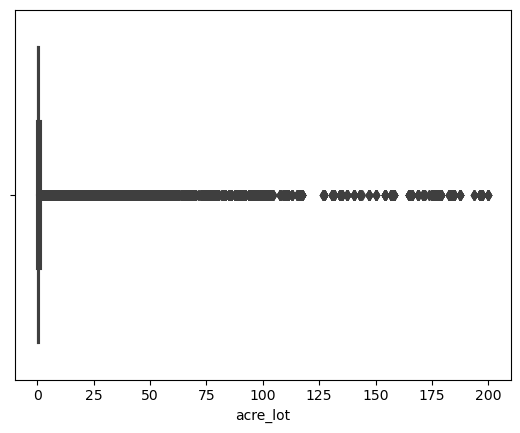

In [28]:
sns.boxplot(data=df, x="acre_lot")

#### Model wont be able to detect price in house over 20000 m^2

In [29]:
len(df[df["house_size"] >= 20000]) / len(df["house_size"].index) * 100

0.1161847785993014

In [30]:
df = df.drop(df[df["house_size"] >= 20000].index, axis=0)

<AxesSubplot:xlabel='house_size'>

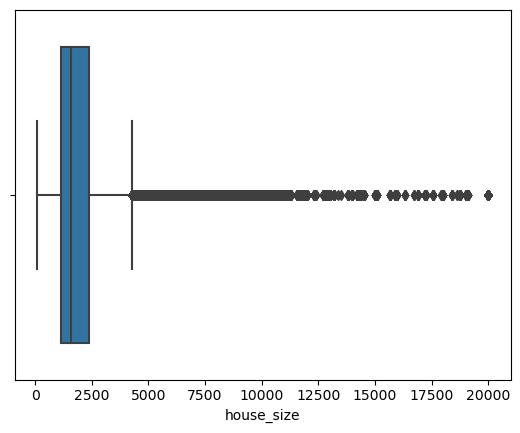

In [31]:
sns.boxplot(data=df, x="house_size")

## Predicting arce_lot  and filling NA values base on predictions

In [32]:
df.isna().sum().sort_values(ascending=False)

acre_lot         159449
house_size       109534
bed                   0
bath                  0
price                 0
state_numeric         0
dtype: int64

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

Make new_df without NaN values in house_size

In [34]:
new_df = df[df["house_size"].notna()]

In [35]:
# Make df without acre-lot
filled_df = new_df.dropna(subset=["acre_lot"])
# Make df with acre-lot where values in NaN
missing_df = df[df['acre_lot'].isna()]
# Make df without acre-lot from missing_df
predict_df = missing_df.drop("acre_lot", axis=1)

Scale Features

In [36]:
scaler = StandardScaler()
scaler.fit(filled_df.drop("acre_lot", axis=1))

predict_df = scaler.transform(predict_df)

In [37]:
X = scaler.transform(filled_df.drop("acre_lot", axis=1))
y = filled_df["acre_lot"]

Create KNeighborsRegressor with list from 1 to 10 neighbors

In [38]:
KNN = KNeighborsRegressor()

n_list = list(range(1,10))
param_grid_knn = {"n_neighbors": n_list}

In [39]:
grid_knn = GridSearchCV(KNN, param_grid_knn)

In [40]:
grid_knn.fit(X, y)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [41]:
grid_knn.best_estimator_.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 1,
 'p': 2,
 'weights': 'uniform'}

In [42]:
preds = grid_knn.predict(predict_df)

Filling NAN data in acre_lot rows, which model predicted

In [43]:
df.loc[df['acre_lot'].isna(), 'acre_lot'] = preds

In [44]:
((df.isna().sum() / len(df)) * 100).sort_values(ascending=False)

house_size       16.376589
bed               0.000000
bath              0.000000
acre_lot          0.000000
price             0.000000
state_numeric     0.000000
dtype: float64

## Predicting house_size  and filling NA values base on predictions

Make the same process like in acre_lot 

In [45]:
filled_df = df.dropna(subset=["house_size"])
missing_df = df[df['house_size'].isna()]
predict_df = missing_df.drop("house_size", axis=1)

In [46]:
scaler = StandardScaler()
scaler.fit(filled_df.drop("house_size", axis=1))

predict_df = scaler.transform(predict_df)

In [47]:
X = scaler.transform(filled_df.drop("house_size", axis=1))
y = filled_df["house_size"]

In [48]:
KNN = KNeighborsRegressor()

n_list = list(range(1,10))
param_grid_knn = {"n_neighbors": n_list}

grid_knn = GridSearchCV(KNN, param_grid_knn)

In [49]:
grid_knn.fit(X, y)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [50]:
grid_knn.best_estimator_.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 1,
 'p': 2,
 'weights': 'uniform'}

In [51]:
preds = grid_knn.predict(predict_df)

In [52]:
df.loc[df['house_size'].isna(), 'house_size'] = preds

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668845 entries, 0 to 904965
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   bed            668845 non-null  float64
 1   bath           668845 non-null  float64
 2   acre_lot       668845 non-null  float64
 3   house_size     668845 non-null  float64
 4   price          668845 non-null  float64
 5   state_numeric  668845 non-null  int32  
dtypes: float64(5), int32(1)
memory usage: 33.2 MB


In [54]:
df

,bed,bath,acre_lot,house_size,price,state_numeric
0,3.0,2.0,0.12,920.0,105000.0,8
1,4.0,2.0,0.08,1527.0,80000.0,8
2,2.0,1.0,0.15,748.0,67000.0,8
3,4.0,2.0,0.10,1800.0,145000.0,8
4,6.0,2.0,0.05,1500.0,65000.0,8
...,...,...,...,...,...,...
904958,1.0,1.0,0.02,700.0,245000.0,6
904959,1.0,1.0,0.99,720.0,265000.0,6
904960,2.0,2.0,0.10,1200.0,399000.0,6
904962,2.0,2.0,0.02,1200.0,299000.0,6


## Data Visualization

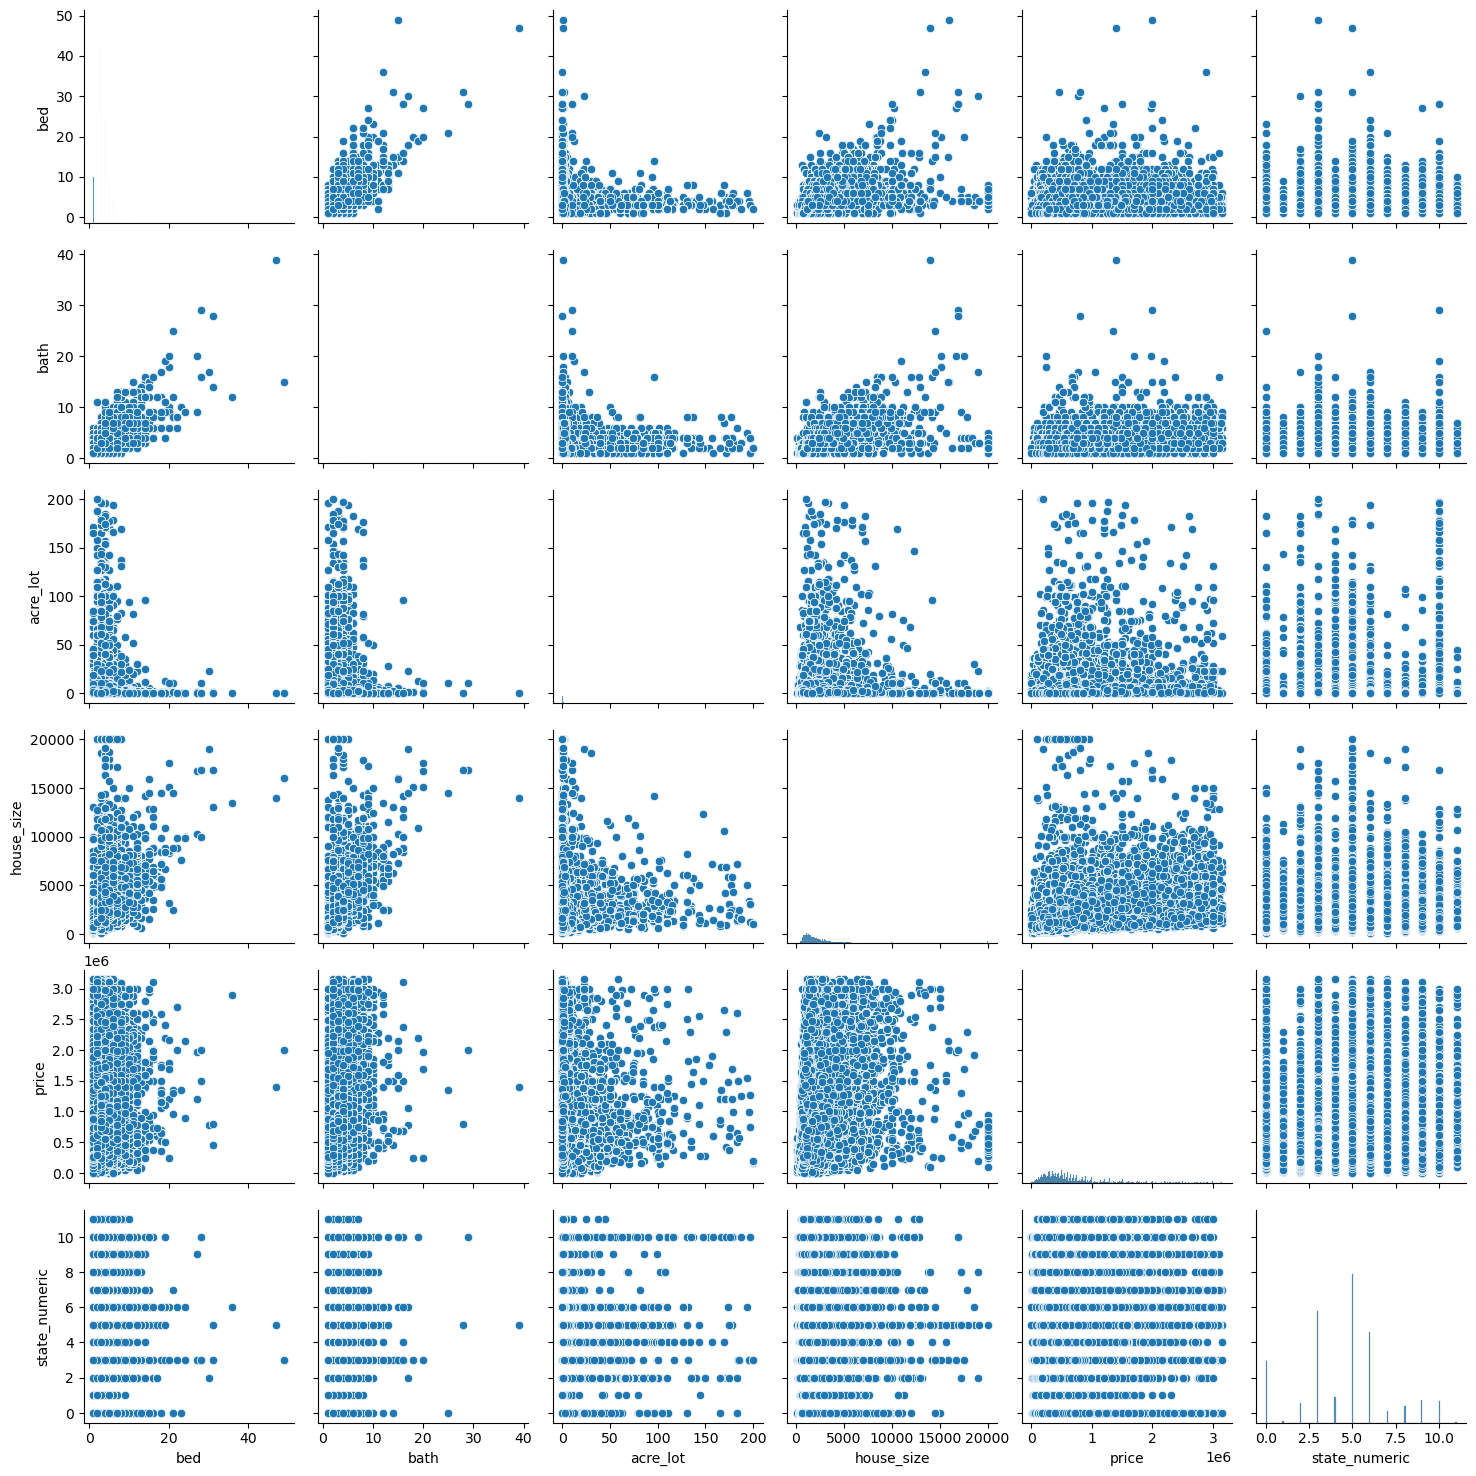

In [55]:
sns.pairplot(df);

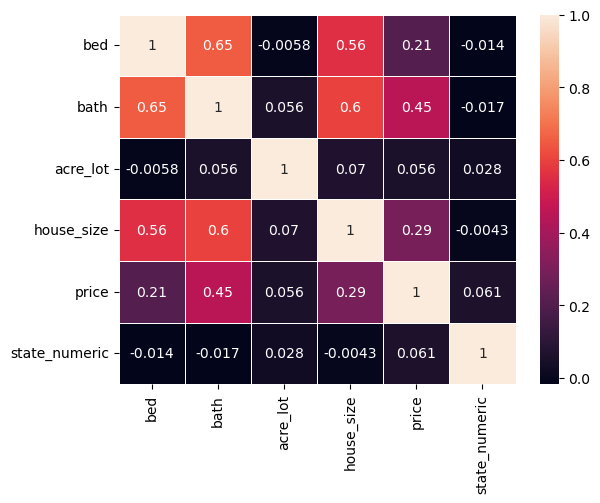

In [56]:
sns.heatmap(df.corr(), annot=True, linewidths=0.5);

Each columns have positive correlaction with colum price

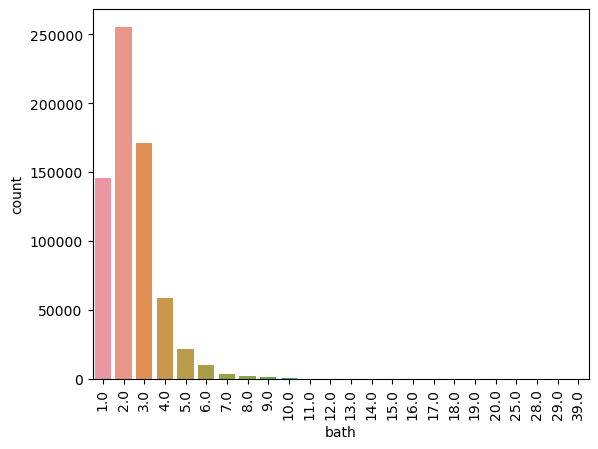

In [57]:
sns.countplot(data=df, x="bath")
plt.xticks(rotation=90);

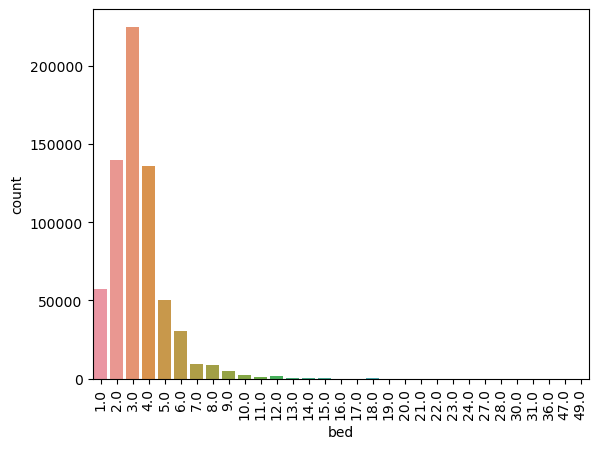

In [58]:
sns.countplot(data=df, x="bed")
plt.xticks(rotation=90);

<AxesSubplot:xlabel='house_size', ylabel='Count'>

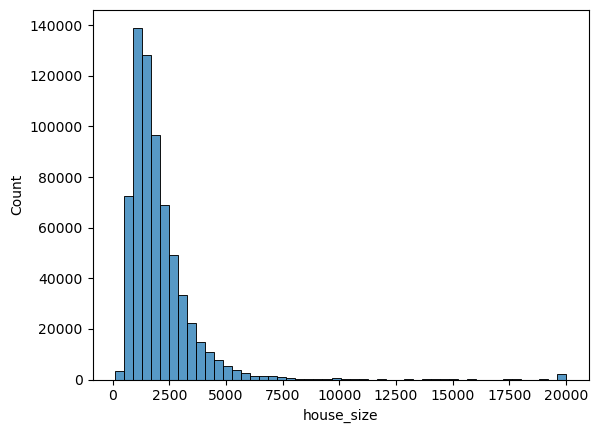

In [59]:
sns.histplot(data=df, x="house_size", bins=50)

<AxesSubplot:xlabel='price', ylabel='Count'>

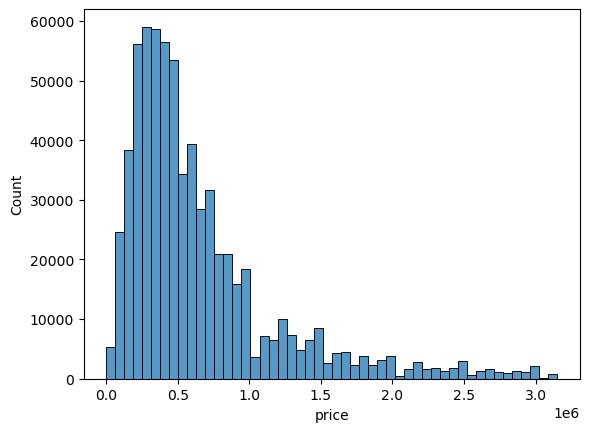

In [60]:
sns.histplot(data=df, x="price", bins=50)

In [61]:
print(numeric_to_state)
df.groupby("state_numeric")[["price", "house_size", "bed", "bath"]].mean().sort_values(ascending=False, by="price").round(2)

{0: 'Connecticut', 1: 'Delaware', 2: 'Maine', 3: 'Massachusetts', 4: 'New Hampshire', 5: 'New Jersey', 6: 'New York', 7: 'Pennsylvania', 8: 'Puerto Rico', 9: 'Rhode Island', 10: 'Vermont', 11: 'Virgin Islands'}


,price,house_size,bed,bath
state_numeric,,,,
6,1059606.19,1595.08,2.97,2.23
11,894540.59,3082.12,3.58,3.15
3,801625.78,2058.47,3.37,2.46
5,564265.94,2288.47,3.52,2.57
4,526639.03,2130.20,3.14,2.42
10,523395.04,2276.14,3.46,2.65
9,470869.21,2125.37,3.58,2.29
2,449041.77,2033.22,3.47,2.25
0,402972.96,1965.28,3.47,2.48


## Regression Price Models

In [62]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [63]:
X = df.drop("price", axis=1)
y = df["price"]

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

Scaling functions due to different numbers

In [65]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Creating Regressors

In [66]:
rfr = RandomForestRegressor()
gbr = GradientBoostingRegressor()
abr = AdaBoostRegressor()

Choosing parameters grid for RandomForestRegressors

In [67]:
param_grid_rfr = {"n_estimators":[72, 100, 128], "max_features":[2,3,4]}

Choosing parameters grid for GradientBoostingRegressor

In [68]:
param_grid_gbr = {"n_estimators":[72, 100, 128], "learning_rate":[0.1, 0.05, 0.2],
                  "max_depth":[3,4,5]}

Choosing parameters grid for AdaBoostRegressor

In [69]:
param_grid_abr = {"n_estimators":[5, 10, 15, 25, 40], "learning_rate":[0.1, 0.05, 0.2]}

In [70]:
grid_rfr = GridSearchCV(rfr, param_grid_rfr)

grid_gbr = GridSearchCV(gbr, param_grid_gbr)

grid_abr = GridSearchCV(abr, param_grid_abr)

Fitting data

In [71]:
grid_rfr.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 3, 4],
                         'n_estimators': [72, 100, 128]})

In [72]:
grid_gbr.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [72, 100, 128]})

In [73]:
grid_abr.fit(X_train, y_train)

GridSearchCV(estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'n_estimators': [5, 10, 15, 25, 40]})

Making predictions for models

In [75]:
preds_gbr = grid_gbr.predict(X_test)
preds_rfr = grid_rfr.predict(X_test)
preds_abr = grid_abr.predict(X_test)

In [76]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [78]:
print(f"Best Parameters grid_rfr: {grid_rfr.best_params_}\n")
print(f"Best Parameters grid_gbr: {grid_gbr.best_params_}\n")
print(f"Best Parameters grid_abr: {grid_abr.best_params_}\n")

Best Parameters grid_rfr: {'max_features': 2, 'n_estimators': 128}

Best Parameters grid_gbr: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 128}

Best Parameters grid_abr: {'learning_rate': 0.2, 'n_estimators': 15}



In [79]:
def measures(predictions):
    MAE = mean_absolute_error(y_test, predictions).round(3)
    MSE = mean_squared_error(y_test, predictions).round(3)
    RMSE = np.sqrt(mean_squared_error(y_test, predictions)).round(3)
    print(f"MAE: {MAE}, MSE: {MSE}, RMSE: {RMSE} \n")
    sns.kdeplot(data=predictions, label="Predicted")
    sns.kdeplot(data=y_test, label="Actual")
    plt.legend();

MAE: 16731.507, MSE: 6800654209.858, RMSE: 82466.079 



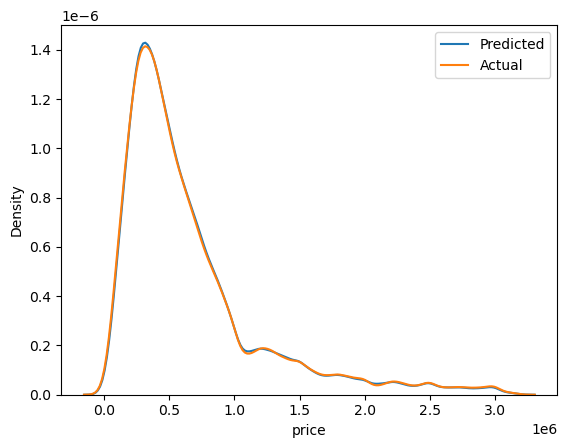

In [80]:
measures(preds_rfr)

MAE: 213850.378, MSE: 110534565342.994, RMSE: 332467.39 



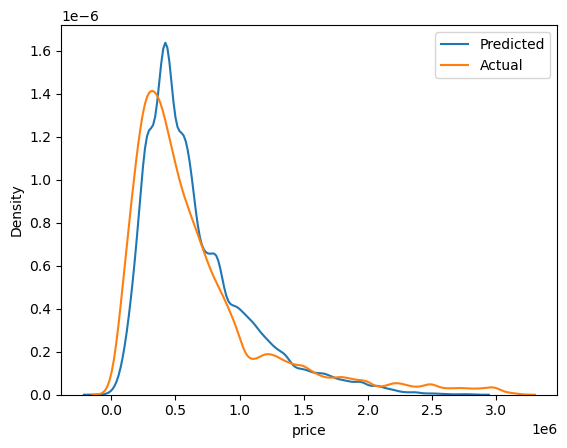

In [81]:
measures(preds_gbr)

MAE: 342261.948, MSE: 208923986455.046, RMSE: 457082.035 



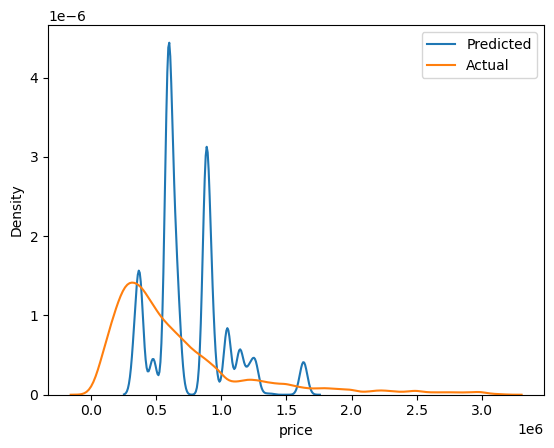

In [82]:
measures(preds_abr)